## CJ 프레시웨이 주가 분석 및 키워드 분석
* CJ 프레시웨이(051500) 주가 분석 (2020.01.01~2020.09.18(작성 시점))
* 경쟁사 비교&분석
* 코로나 위기를 이겨낼 수 있게 하는 예상 주력 사업 키워드 (최대 5개) 분석
* 포스트 코로나 시대에 CJ프레시웨이의 단점 보안 및 대처법 추천

### CJ 프레시웨이 주가
* 네이버 증권 (https://finance.naver.com/item/sise.nhn?code=051500)
* DB ('CJfreshwayStock)저장

In [1]:
import sqlite3
import requests # 내부 source 를 가져오는 라이브러리
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd

In [2]:
# 함수 선언부 url 을 매개변수화
def stockGet(url=''):    
    src=requests.get(url)
    result=src.content.strip()
    html=BeautifulSoup(result,'html.parser')
    tgts=html.select('table.type2 tr')
    #len(tgt)
    res=[]
    #tgts가 16개씩 나옴 1 page, 그 중에 10개만.
    for tgt in tgts:
        if(tgt.select('td .p10')):
            sday=tgt.select('td .p10')[0].text.replace(".","")

            endp=tgt.select('td.num')[0].text.replace(",","")
            startp=tgt.select('td.num')[2].text.replace(",","")
            maxp=tgt.select('td.num')[3].text.replace(",","")
            minp=tgt.select('td.num')[4].text.replace(",","")
            vol=tgt.select('td.num')[5].text.replace(",","")
            res.append((sday,startp,maxp,minp,endp,vol))
    return res


In [3]:
def addData(data):
    with sqlite3.connect(dbname) as conn:
        cur=conn.cursor()
        sql = 'insert into StockDay \
        (SIDX,SCODE,SCOMP,SDAY,OPENP,HIGHP,LOWP,CLOSEP,VOL) \
        values (?,?,?,?,?,?,?,?,?)'
        ##### data=[1001,60000,' 신세계','20200830',30,60,70,50,250]
        cur.execute(sql,data)
        conn.commit()
        cur.close()

In [4]:
# 주가 DB에 넣기
dbname='CJfreshwayStock.db'
def selData(whr='where SIDX=0'):
    with sqlite3.connect(dbname) as conn:
        cur=conn.cursor()
        sql='select SIDX from StockDay '+whr
        cur.execute(sql)
        rows=cur.fetchall()
        cur.close()
    return rows

In [10]:
urlsrc='https://finance.naver.com/item/sise_day.nhn?code={0}&page={1}'
sCode='051500';
sComp='CJ 프레시웨이' #~473
for i in range(250, 474):
    print("#"*30)
    url=urlsrc.format(sCode,i)
    print(url)
    # 데이터 10개 가져오기
    rs=stockGet(url)
    
    for r in rs:
        # 데이터별 고유코드만들기
        sidx=r[0]+sCode
        ##### data=[1001,60000,' 신세계','20200830',30,60,70,50,250]
        data=[sidx,sCode,sComp,r[0],r[1],r[2],r[3],r[4],r[5]]
        #데이터 입력하기 중복데이터 확인
        preData=selData(' where SIDX='+sidx)
        if(preData):
            print("중복데이터 입니다.", sidx)
        else:
            #print(r)
            addData(data)

##############################
https://finance.naver.com/item/sise_day.nhn?code=051500&page=250
##############################
https://finance.naver.com/item/sise_day.nhn?code=051500&page=251
##############################
https://finance.naver.com/item/sise_day.nhn?code=051500&page=252
##############################
https://finance.naver.com/item/sise_day.nhn?code=051500&page=253
##############################
https://finance.naver.com/item/sise_day.nhn?code=051500&page=254
##############################
https://finance.naver.com/item/sise_day.nhn?code=051500&page=255
##############################
https://finance.naver.com/item/sise_day.nhn?code=051500&page=256
##############################
https://finance.naver.com/item/sise_day.nhn?code=051500&page=257
##############################
https://finance.naver.com/item/sise_day.nhn?code=051500&page=258
##############################
https://finance.naver.com/item/sise_day.nhn?code=051500&page=259
##############################
https://f

##############################
https://finance.naver.com/item/sise_day.nhn?code=051500&page=336
##############################
https://finance.naver.com/item/sise_day.nhn?code=051500&page=337
##############################
https://finance.naver.com/item/sise_day.nhn?code=051500&page=338
##############################
https://finance.naver.com/item/sise_day.nhn?code=051500&page=339
##############################
https://finance.naver.com/item/sise_day.nhn?code=051500&page=340
##############################
https://finance.naver.com/item/sise_day.nhn?code=051500&page=341
##############################
https://finance.naver.com/item/sise_day.nhn?code=051500&page=342
##############################
https://finance.naver.com/item/sise_day.nhn?code=051500&page=343
##############################
https://finance.naver.com/item/sise_day.nhn?code=051500&page=344
##############################
https://finance.naver.com/item/sise_day.nhn?code=051500&page=345
##############################
https://f

##############################
https://finance.naver.com/item/sise_day.nhn?code=051500&page=422
##############################
https://finance.naver.com/item/sise_day.nhn?code=051500&page=423
##############################
https://finance.naver.com/item/sise_day.nhn?code=051500&page=424
##############################
https://finance.naver.com/item/sise_day.nhn?code=051500&page=425
##############################
https://finance.naver.com/item/sise_day.nhn?code=051500&page=426
##############################
https://finance.naver.com/item/sise_day.nhn?code=051500&page=427
##############################
https://finance.naver.com/item/sise_day.nhn?code=051500&page=428
##############################
https://finance.naver.com/item/sise_day.nhn?code=051500&page=429
##############################
https://finance.naver.com/item/sise_day.nhn?code=051500&page=430
##############################
https://finance.naver.com/item/sise_day.nhn?code=051500&page=431
##############################
https://f

In [5]:
# DB에서 2020년 주가만 가져오기
dbname='CJfreshwayStock.db'
def selData(whr='where SIDX=0'):
    with sqlite3.connect(dbname) as conn:
        cur=conn.cursor()
        sql='select SDAY, OPENP, HIGHP,LOWP, CLOSEP, VOL from StockDay '+whr
        cur.execute(sql)
        rows=cur.fetchall()
        cur.close()
    return rows

In [7]:
whr='where SDAY>20200101 and SCODE="051500" order by SDAY asc limit 180'
res = selData(whr)
cols=['SDAY', 'OPENP', 'HIGHP','LOWP', 'CLOSEP', 'VOL']
df=pd.DataFrame(data=res, columns=cols)
df

,SDAY,OPENP,HIGHP,LOWP,CLOSEP,VOL
0,20200102,28250,28400,27400,27800,22643
1,20200103,28000,28200,27800,27800,17764
2,20200106,28150,28150,27150,27400,23514
3,20200107,27400,28750,27400,28000,43465
4,20200108,28250,28250,26900,26900,38740
...,...,...,...,...,...,...
175,20200914,17000,17900,16500,17900,317117
176,20200915,18200,18300,17650,17900,277883
177,20200916,18300,18300,17550,17900,165434
178,20200917,17900,17900,17000,17050,122588


In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fname=fm.FontProperties(fname='malgun.ttf').get_name()
mpl.rc('font',family=fname)
import matplotlib.gridspec as gridspec

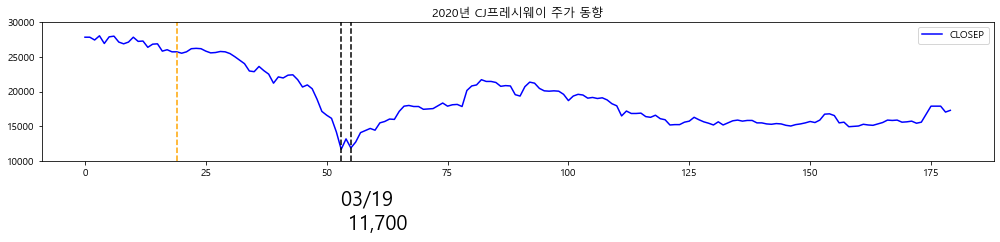

In [9]:
# CLOSEP는 종가

plt.rcParams["figure.figsize"] = (14,4)
day=list(df['SDAY'])
df['CLOSEP'].plot(kind='line', x=day, y='price', color='Blue')

font = {'family': fname,
            'color':  'black',
            'weight': 'normal',
            'size': 20}
        
plt.ylim(10000,30000)
plt.axvline(53,color='black',linestyle="--")
plt.axvline(55,color='black',linestyle="--")
plt.text(53,150,"03/19 \n 11,700",fontdict=font)
plt.axvline(19,color='orange',linestyle="--")
plt.title('2020년 CJ프레시웨이 주가 동향')
plt.legend()
plt.tight_layout()
plt.show()

#### 주가 분석
* 2020.03.19 11700원으로 장 마감.
* 2월, 코로나가 본격적으로 확산되면서 하락세(주황색 선 이후)
* 3월, 학생들이 등교를 하지 않고, 학교 급식이 운영이 되지 않아 단체급식사업에 타격.
* 사회적 거리두기로 인한 레스토랑, 일반식당, 호텔 등 이용률 하락으로 식자재사업에 영향.
* 2020.03.12 WHO 팬데믹 선언, 2020.03.19 삼성을 포함한 다른 기업들(현대, 기아)의 해외 공장 중지 등의 영향.
* 이후 상승세를 보이기 시작함.

### 타 경쟁사 주가 비교
* 경쟁사는 '현대그린푸드(005440)', '신세계푸드(031440)'로 선정하여 비교

In [10]:
compList=[
    ("현대그린푸드", "005440"),
    ("신세계푸드","031440")
    ]

In [11]:
def MyCrawl(comp=("현대그린푸드", "005440"),sp=1,ep=2):
    sCode=comp[1]
    sComp=comp[0]
    urlsrc='https://finance.naver.com/item/sise_day.nhn?code={0}&page={1}'
    for i in range(sp,ep):
        print("#"*30)
        url=urlsrc.format(sCode,i)
        print(url)
        # 데이터 10개 가져오기
        rs=stockGet(url)
    
        for r in rs:
            # 데이터별 고유코드만들기
            sidx=r[0]+sCode
            ##### data=[1001,60000,' 신세계','20200830',30,60,70,50,250]
            data=[sidx,sCode,sComp,r[0],r[1],r[2],r[3],r[4],r[5]]
            #데이터 입력하기 중복데이터 확인
            preData=selData(' where SIDX='+sidx)
            if(preData):
                print("중복데이터 입니다.", preData)
            else:
                #print(r)
                addData(data)

In [54]:
# 현대그린푸드 주가
MyCrawl(compList[0],1,19)

##############################
https://finance.naver.com/item/sise_day.nhn?code=005440&page=1
##############################
https://finance.naver.com/item/sise_day.nhn?code=005440&page=2
##############################
https://finance.naver.com/item/sise_day.nhn?code=005440&page=3
##############################
https://finance.naver.com/item/sise_day.nhn?code=005440&page=4
##############################
https://finance.naver.com/item/sise_day.nhn?code=005440&page=5
##############################
https://finance.naver.com/item/sise_day.nhn?code=005440&page=6
##############################
https://finance.naver.com/item/sise_day.nhn?code=005440&page=7
##############################
https://finance.naver.com/item/sise_day.nhn?code=005440&page=8
##############################
https://finance.naver.com/item/sise_day.nhn?code=005440&page=9
##############################
https://finance.naver.com/item/sise_day.nhn?code=005440&page=10
##############################
https://finance.naver.com/it

In [56]:
# 신세계푸드 주가
MyCrawl(compList[1],1,20)

##############################
https://finance.naver.com/item/sise_day.nhn?code=031440&page=1
##############################
https://finance.naver.com/item/sise_day.nhn?code=031440&page=2
##############################
https://finance.naver.com/item/sise_day.nhn?code=031440&page=3
##############################
https://finance.naver.com/item/sise_day.nhn?code=031440&page=4
##############################
https://finance.naver.com/item/sise_day.nhn?code=031440&page=5
##############################
https://finance.naver.com/item/sise_day.nhn?code=031440&page=6
##############################
https://finance.naver.com/item/sise_day.nhn?code=031440&page=7
##############################
https://finance.naver.com/item/sise_day.nhn?code=031440&page=8
##############################
https://finance.naver.com/item/sise_day.nhn?code=031440&page=9
##############################
https://finance.naver.com/item/sise_day.nhn?code=031440&page=10
##############################
https://finance.naver.com/it

In [12]:
# 현대그린푸드005440
whr='where SDAY>=20200101 and SCODE="005440" order by SDAY asc'
res = selData(whr)
cols=['SDAY', 'OPENP', 'HIGHP','LOWP', 'CLOSEP', 'VOL']
hddf=pd.DataFrame(data=res, columns=cols)
hddf.head()

,SDAY,OPENP,HIGHP,LOWP,CLOSEP,VOL
0,20200102,11800,11900,11650,11650,122167
1,20200103,11750,11900,11500,11550,131961
2,20200106,11500,11600,11250,11300,99672
3,20200107,11500,11500,11150,11200,133571
4,20200108,11100,11150,10800,10950,210252


In [13]:
# 신세계푸드 031440
whr='where SDAY>=20200101 and SCODE="031440" order by SDAY asc'
res = selData(whr)
cols=['SDAY', 'OPENP', 'HIGHP','LOWP', 'CLOSEP', 'VOL']
ssgdf=pd.DataFrame(data=res, columns=cols)
ssgdf.head()

,SDAY,OPENP,HIGHP,LOWP,CLOSEP,VOL
0,20200102,70300,71300,70100,71200,4481
1,20200103,71400,71600,70900,71200,2996
2,20200106,70800,71500,69700,70000,3294
3,20200107,69700,70800,69700,70400,2611
4,20200108,70400,70400,68500,69100,5852


### 시각화하기

In [14]:
y1= df['CLOSEP']
y2= hddf['CLOSEP']
y3= ssgdf['CLOSEP']

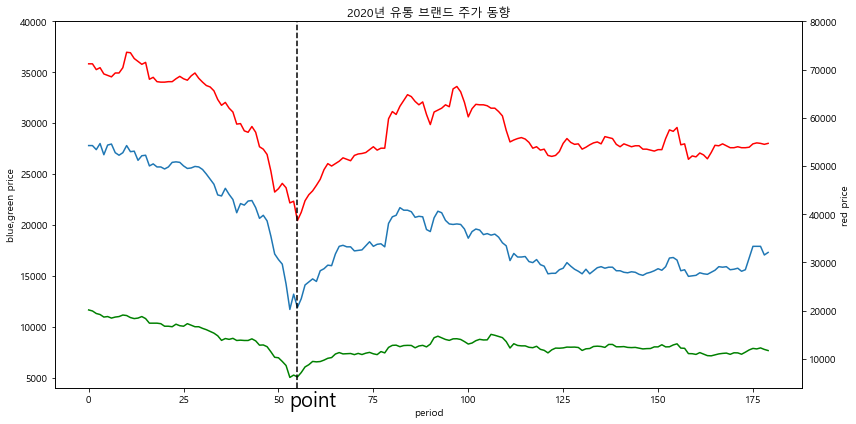

In [15]:
plt.rcParams["figure.figsize"]=(12,6)
fig, ax1=plt.subplots()
ax2=ax1.twinx()

# plot with properties
line3= ax2.plot(np.arange(len(hddf)), y3, color='r') # 신세계푸드
line1= ax1.plot(np.arange(len(hddf)), y1)            # CJ프레시웨이
line2= ax1.plot(np.arange(len(hddf)), y2, color='g') # 현대그린푸드

# plot without sorting
ax1.set_xlabel('period')
ax1.set_ylabel('blue,green price')
ax2.set_ylabel('red price')

#set y limit
ax1.set_ylim(4000,40000)
ax2.set_ylim(4000,80000)

# plot legend for all y axis
lines=line1+line2+line3
labels = [l.get_label() for l in lines]

plt.axvline(55,color='black',linestyle="--")
plt.text(53,150,'point',fontdict=font)
plt.title('2020년 유통 브랜드 주가 동향')

fig.tight_layout()
plt.show()

### 동향 비교 
* 빨강 - 신세계푸드, 파랑 - CJ프레시웨이, 초록 - 현대그린푸드

* 그래프가 매우 비슷함.
* 같은 지점에서 하락하고 상승하는 모습을 보임.
* 2020.03.12 미국 나스닥에서 개장하자마자 사이드카, 그리고 2020.03.13일 한국, 16일 미국에서 서킷브레이커가 발동된 여파라고 보여짐.
* 이 날 미국, 한국, 일본의 주가가 크게 하락함.
* 코로나의 영향으로 어려워지고 있었지만, 결정적으로 외국 증시의 하락에 영향을 받은 것으로 보임.

### CJ프레시웨이에서 주력하는 사업 키워드 (최대 5개) 분석
* CJ프레시웨어에서 주력하는 사업 키워드
* HMR(간편가정식), 케어푸드, 미트솔루션, 센트럴키친, 송림푸드
* 네이버 데이터랩에서 제공하는 검색어 트렌드(네이버통합검색에서 특정 검색어의 검색 횟수를 제공)참고
* 검색어 증가량 분석

In [16]:
nid='1cS_Gm5xHN0soTgp9tzz'
nkey='eDJrrsMXmo'

In [17]:
import json ###########################
import os
import sys
import urllib.request

In [18]:
def makeQry(keywords=[],sday='2019-01-01',eday='2020-08-30',tunit='date'):
    res=[]
    for words in keywords:
        dict={'groupName':words[0],'keywords':words}
        res.append(dict)
    rdict={"startDate":sday,
    "endDate":eday,
    "timeUnit":tunit,
    "keywordGroups":res
          }
    return json.dumps(rdict,ensure_ascii = False )


In [19]:
def Mynsearch(keywords=[],sday='2020-01-01',eday='2020-09-18',tunit='month'):    
    client_id = nid ##########################
    client_secret = nkey ###########################
    url = "https://openapi.naver.com/v1/datalab/search";
    
    body=makeQry(keywords,sday,eday,tunit)
    
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)
    request.add_header("Content-Type","application/json")
    response = urllib.request.urlopen(request, data=body.encode("utf-8"))
    rescode = response.getcode()
    if(rescode==200):
        response_body = response.read()
        res=response_body.decode('utf-8')
        #print(res)
    else:
        res="error"
        print("Error Code:" + rescode)
    return res

In [33]:
def MyDataLab(keywords=[],sday='2020-01-01',eday='2020-09-18',tunit='month'):
    # 네이버 데이터랩 서치
    res=Mynsearch(keywords,sday,eday,tunit)
    #print(res)
    #데이터 추출을 위한 json
    #print(res)
    jdata=json.loads(res)
            #print(len(jdata['results']))
    i=0;
    #테이블 머지를 위한 기초테이블
    maindf=pd.DataFrame()
    # 키워드별로 컬럼명 지정
    for words in keywords:
        pdata=jdata['results'][i]['data']
        i+=1
        if (pdata):
            df=pd.DataFrame.from_dict(pdata)
            print(words[0].strip())
            df.columns=["period",words[0].strip()]
            df1=df.set_index("period")
            maindf=pd.merge(maindf,df1,how="outer",left_index=True,right_index=True)
        else:
            print("검색 데이터가 없습니다.")

    return maindf


HMR
케어푸드
미트솔루션
센트럴키친
송림푸드
                 HMR     케어푸드     미트솔루션   센트럴키친     송림푸드
period                                                  
2020-01-01   9.26108  0.93596   5.81280     NaN  0.54187
2020-01-02  18.07881  1.08374  12.61083  0.2463  2.85714
2020-01-03  16.65024  0.98522  13.49753  0.2463  1.37931
2020-01-04   9.65517      NaN   8.47290     NaN  1.92118
2020-01-05   9.65517  0.73891   9.01477     NaN  1.03448


C:\Data\envs\py37\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


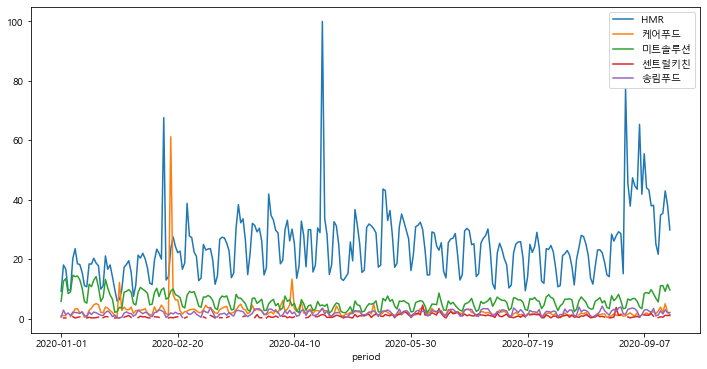

In [36]:
keywords=[
['HMR'],
['케어푸드'],
['미트솔루션'],
['센트럴키친'],
['송림푸드']
]
mdf=MyDataLab(keywords,'2020-01-01','2020-09-18','date')
print(mdf.head())
mdf.plot()
plt.show()

* 2020-01-01 ~ 2020-09-18일까지의 키워드 검색량을 시각화
* HMR > 케어푸드 > 미트솔루션> 송림푸드> 센트럴키친 순으로 검색을 많이 한 것으로 보임.

### 검색어 트렌드 분석을 통한 검색어 증가에 따른 주가 영향 분석
* 검색어 증감에 따른 주가 영향 분석
* 각 검색어 증감에 따른 주가의 증감을 시각화

In [37]:
def MyDBLab(keywords=[],sday='2020-01-01',eday='2020-09-18',tunit='month',scode='051500'):
    mdf=MyDataLab(keywords,sday,eday,tunit)
    sdaycode=sday.replace('-','')
    edaycode=eday.replace('-','')
    whsrc='where SDAY>={0} and SDAY<={1} and SCODE="{2}" order by SDAY  asc'
    whr=whsrc.format(sdaycode,edaycode,scode)
    res=selData(whr)
    cols=['SDAY','OPENP','HIGHP','LOWP','CLOSEP','VOL']
    dfsrc=pd.DataFrame(data=res,columns=cols)
    dfsrc['period']=[str(p)[:4]+"-"+str(p)[4:-2]+"-"+str(p)[-2:] for p in dfsrc['SDAY']]
    dfstock=dfsrc.set_index('period')
    df=pd.merge(dfstock,mdf,how="outer",left_index=True, right_index=True)
    alldf=df.interpolate() ############# 선형보간
    return alldf

In [89]:
def PltDBLab(alldf,keywords,ptitle="사업 키워드와 CJ 프레시웨이 주가의 상관도",xstep=10,axvpos=10):
    xtic=np.arange(0,len(alldf.index),step=xstep)
    xdays=[alldf.index[i] for i in xtic]
    if(len(keywords)==1):
        setdf=alldf[keywords[0]]
    else:
        keys=[k[0] for k in keywords]
        setdf=alldf[keys]
    
    #setdf.head()
    font = {'family': fname,
            'color':  'black',
            'weight': 'normal',
            'size': 15,
            }
    # x 축을 공유하고 y축을 2중 사용
    plt.rcParams["figure.figsize"]=(12,6)
    fig, ax1=plt.subplots()
    plt.xticks(xtic,xdays,rotation=45)

    ax1.plot(alldf['CLOSEP'] ,color='firebrick')
    ax1.set_ylabel("Price")
    ax2=ax1.twinx()
    ax2.set_ylabel("Ratio")
    setdf.plot(ax=ax2)
    pos=axvpos
    plt.axvline(40,color='black',linestyle="--")
    plt.axvline(60,color='black',linestyle="--")
    plt.text(40,-3,"1구간",fontdict=font)
    plt.axvline(135,color='black',linestyle="--")
    plt.axvline(150,color='black',linestyle="--")
    plt.text(135,-3,"2구간",fontdict=font)
    plt.axvline(253,color='black',linestyle="--")
    plt.axvline(265,color='black',linestyle="--")
    plt.text(253,-3,"3구간",fontdict=font)
    plt.title(ptitle)
    plt.legend()
    fig.tight_layout()
    plt.show()

HMR
케어푸드
미트솔루션


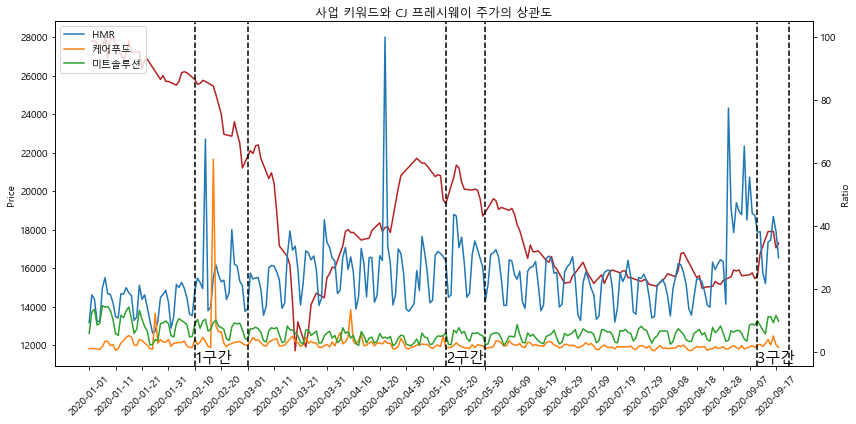

In [90]:
keywords=[
['HMR'],
['케어푸드'],
['미트솔루션'],
#['센트럴키친'],
#['송림푸드']
]
#MyDBLab(keywords)
alldf=MyDBLab(keywords,'2020-01-01','2020-09-18','date','051500')
#alldf.head()
PltDBLab(alldf,keywords,xstep=10)

* 제일 상위 3가지 키워드만 따로 뽑아 시각화해보았음.
* 키워드 검색의 증감과 주가 증감이 겹치는 구간들을 표시.
* 사업 키워드 검색량이 주가에 유의미하게 영향을 끼침을 알 수 있음.